<a href="https://colab.research.google.com/github/Ashwin1235/Market_Segementation_2/blob/main/EV_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING THE LIBRARIES


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#LOADING THE DATASET


In [ ]:
df=pd.read_csv("ElectricCarData_Norm.csv")


In [ ]:
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
df.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [ ]:
print(df.describe(include='all'))

         Brand          Model    Accel  TopSpeed   Range Efficiency  \
count      103            103      103       103     103        103   
unique      33            102       55        25      50         54   
top     Tesla   e-Soul 64 kWh  9.0 sec  160 km/h  250 km  168 Wh/km   
freq        13              2        7        15       6          6   
mean       NaN            NaN      NaN       NaN     NaN        NaN   
std        NaN            NaN      NaN       NaN     NaN        NaN   
min        NaN            NaN      NaN       NaN     NaN        NaN   
25%        NaN            NaN      NaN       NaN     NaN        NaN   
50%        NaN            NaN      NaN       NaN     NaN        NaN   
75%        NaN            NaN      NaN       NaN     NaN        NaN   
max        NaN            NaN      NaN       NaN     NaN        NaN   

       FastCharge              RapidCharge       PowerTrain    PlugType  \
count         103                      103              103         103 

#CHECKING FOR NULL VALUES,DUPLICATES




In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [ ]:
df.duplicated().sum()


0

#CHECKING THE COLUMN NAMES

In [ ]:
df.columns


Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

#VISUALIZING THE DATA

SCATTER PLOT

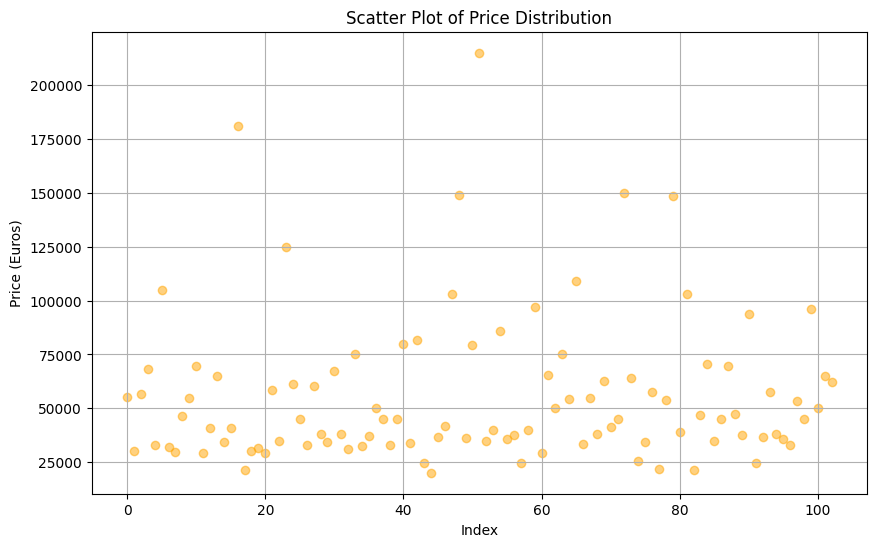

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(df)), df["PriceEuro"], color='orange', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Price (Euros)")
plt.title("Scatter Plot of Price Distribution")
plt.grid(True)

plt.show()

#LINE GRAPH FOR PRICE VS RANGE

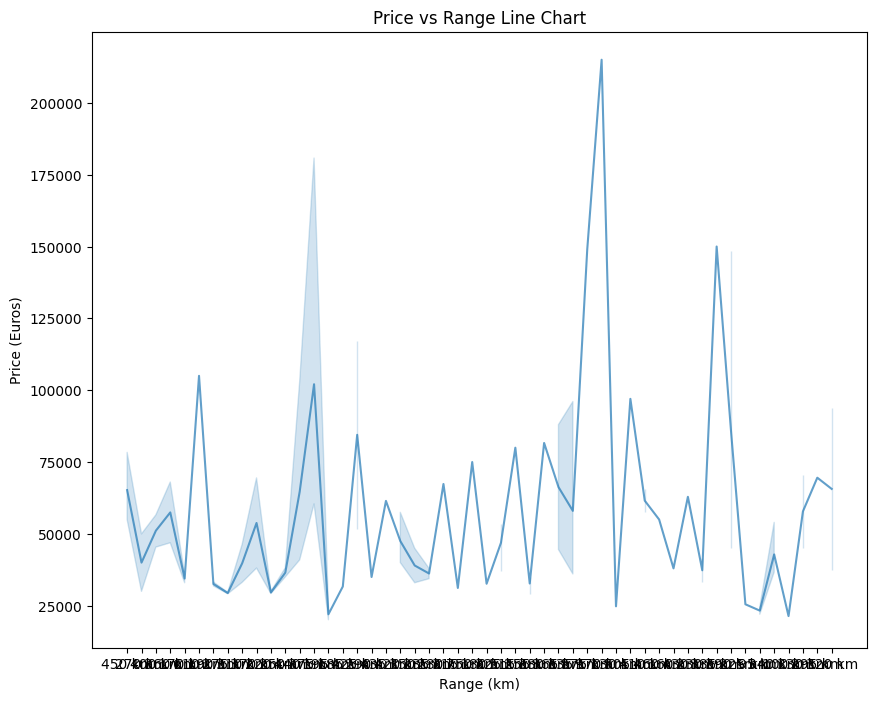

In [ ]:
plt.figure(figsize=(10, 8))

sns.lineplot(x="Range", y="PriceEuro", data=df,alpha=0.7)
plt.xlabel("Range (km)")
plt.ylabel("Price (Euros)")
plt.title("Price vs Range Line Chart")

plt.show()

#VIOLIN GRAPH TO VISUALIZE BETWEEN PRICE AND POWER TRAIN

<ipython-input-16-62ee2d3e54c4>:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(x="PowerTrain", y="PriceEuro", data=df, color="white", edgecolor="gray")


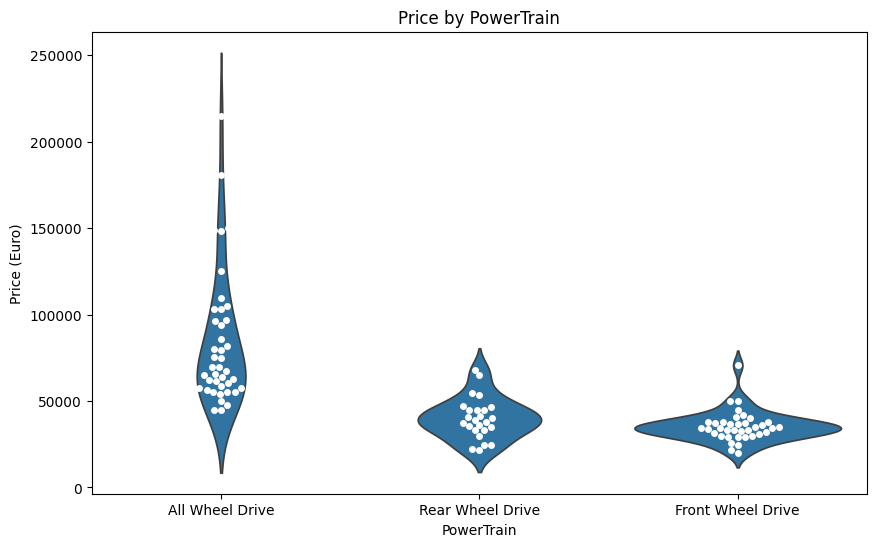

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x="PowerTrain", y="PriceEuro", data=df, inner=None)
sns.swarmplot(x="PowerTrain", y="PriceEuro", data=df, color="white", edgecolor="gray")
plt.title('Price by PowerTrain')
plt.xlabel('PowerTrain')
plt.ylabel('Price (Euro)')

plt.show()

#BAR GRAPH

<ipython-input-17-3b0125c992f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='TopSpeed', data=df, palette='Paired')


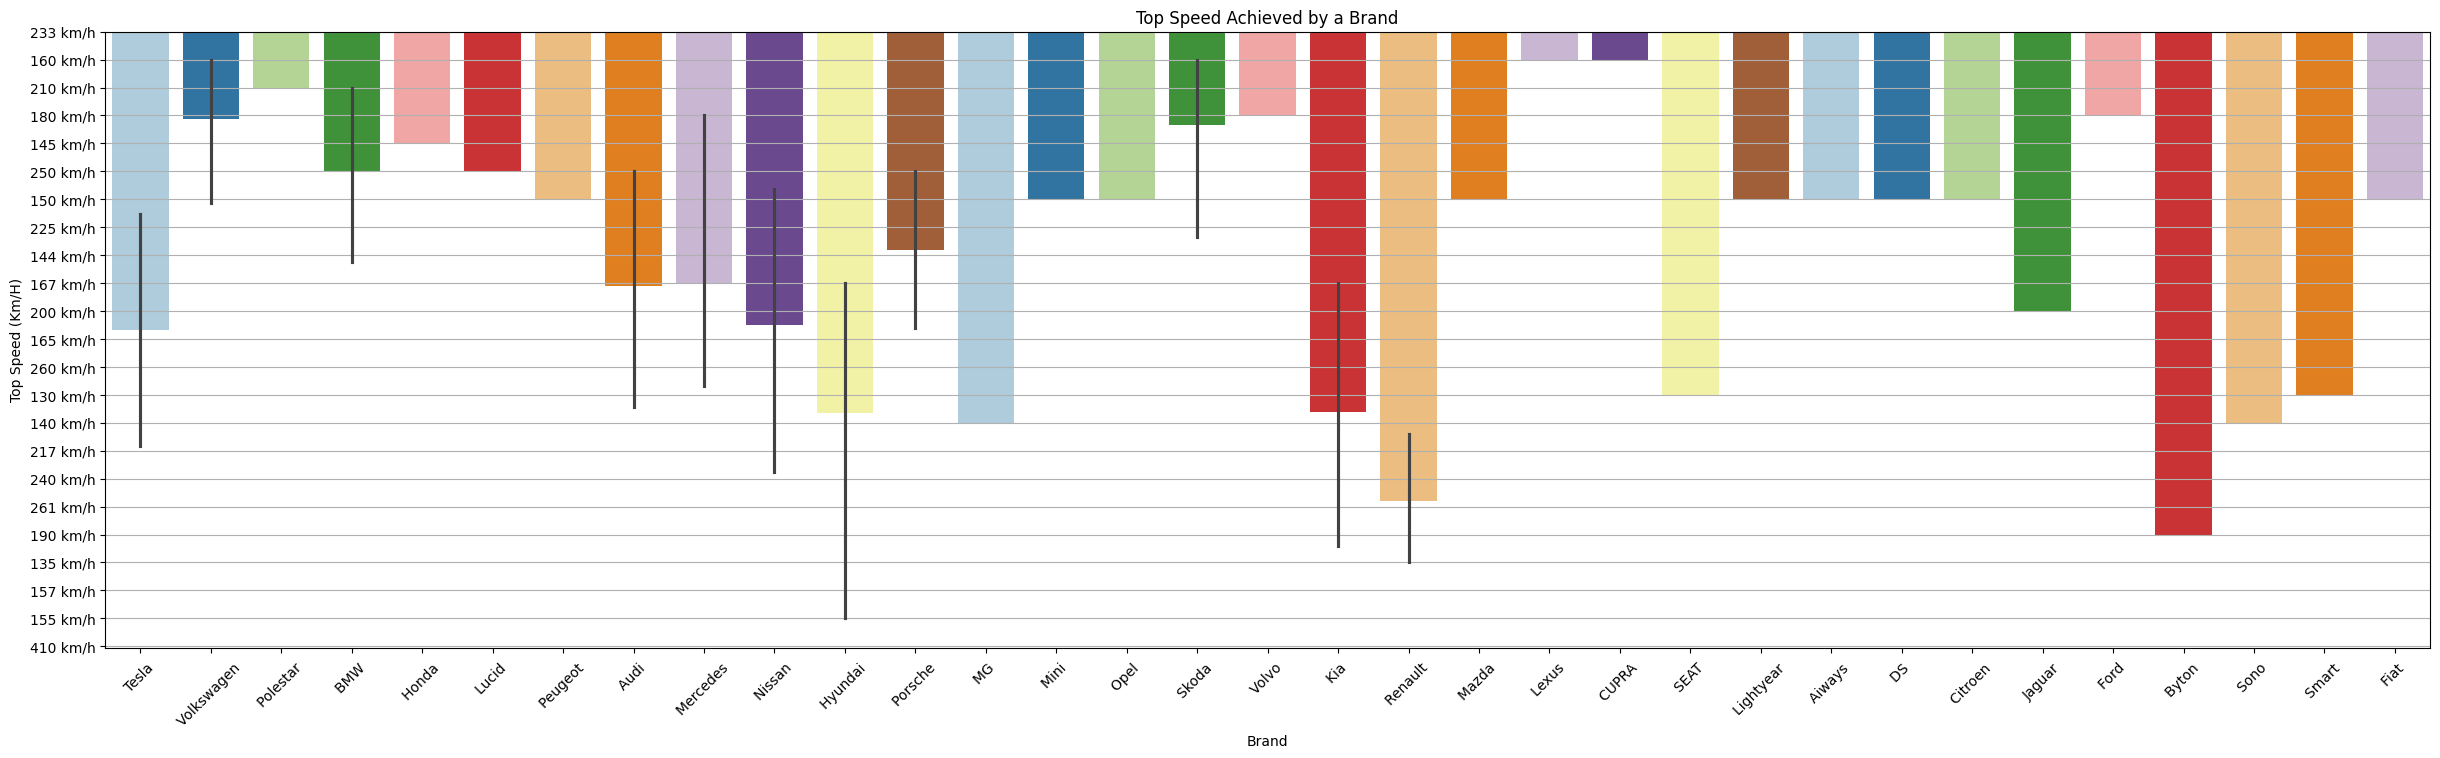

In [ ]:


        # Create the bar plot
        plt.figure(figsize=(30, 8))
        sns.barplot(x='Brand', y='TopSpeed', data=df, palette='Paired')

        # Add gridlines only on the y-axis
        plt.grid(axis='y')

        # Set title and labels
        plt.title('Top Speed Achieved by a Brand')
        plt.xlabel('Brand')
        plt.ylabel('Top Speed (Km/H)')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Show the plot
        plt.show()


#DOUGHNUT GRAPH FOR PLUG TYPE

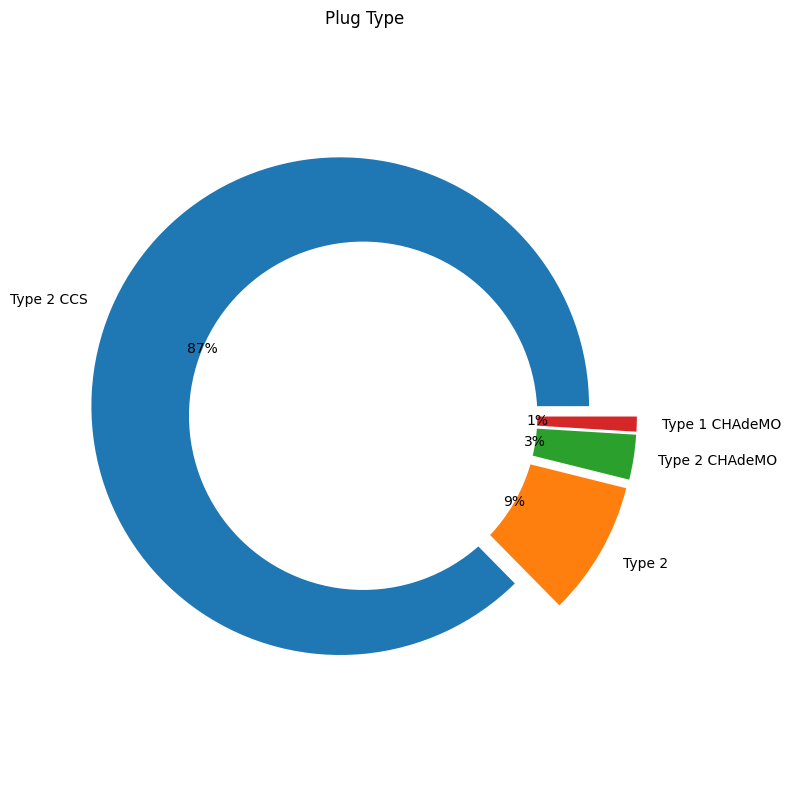

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(df['PlugType'].value_counts(), labels=df['PlugType'].value_counts().index, autopct='%.0f%%', explode=(.1, .1, .1, .1))

# Draw a white circle in the center to create a doughnut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Plug Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

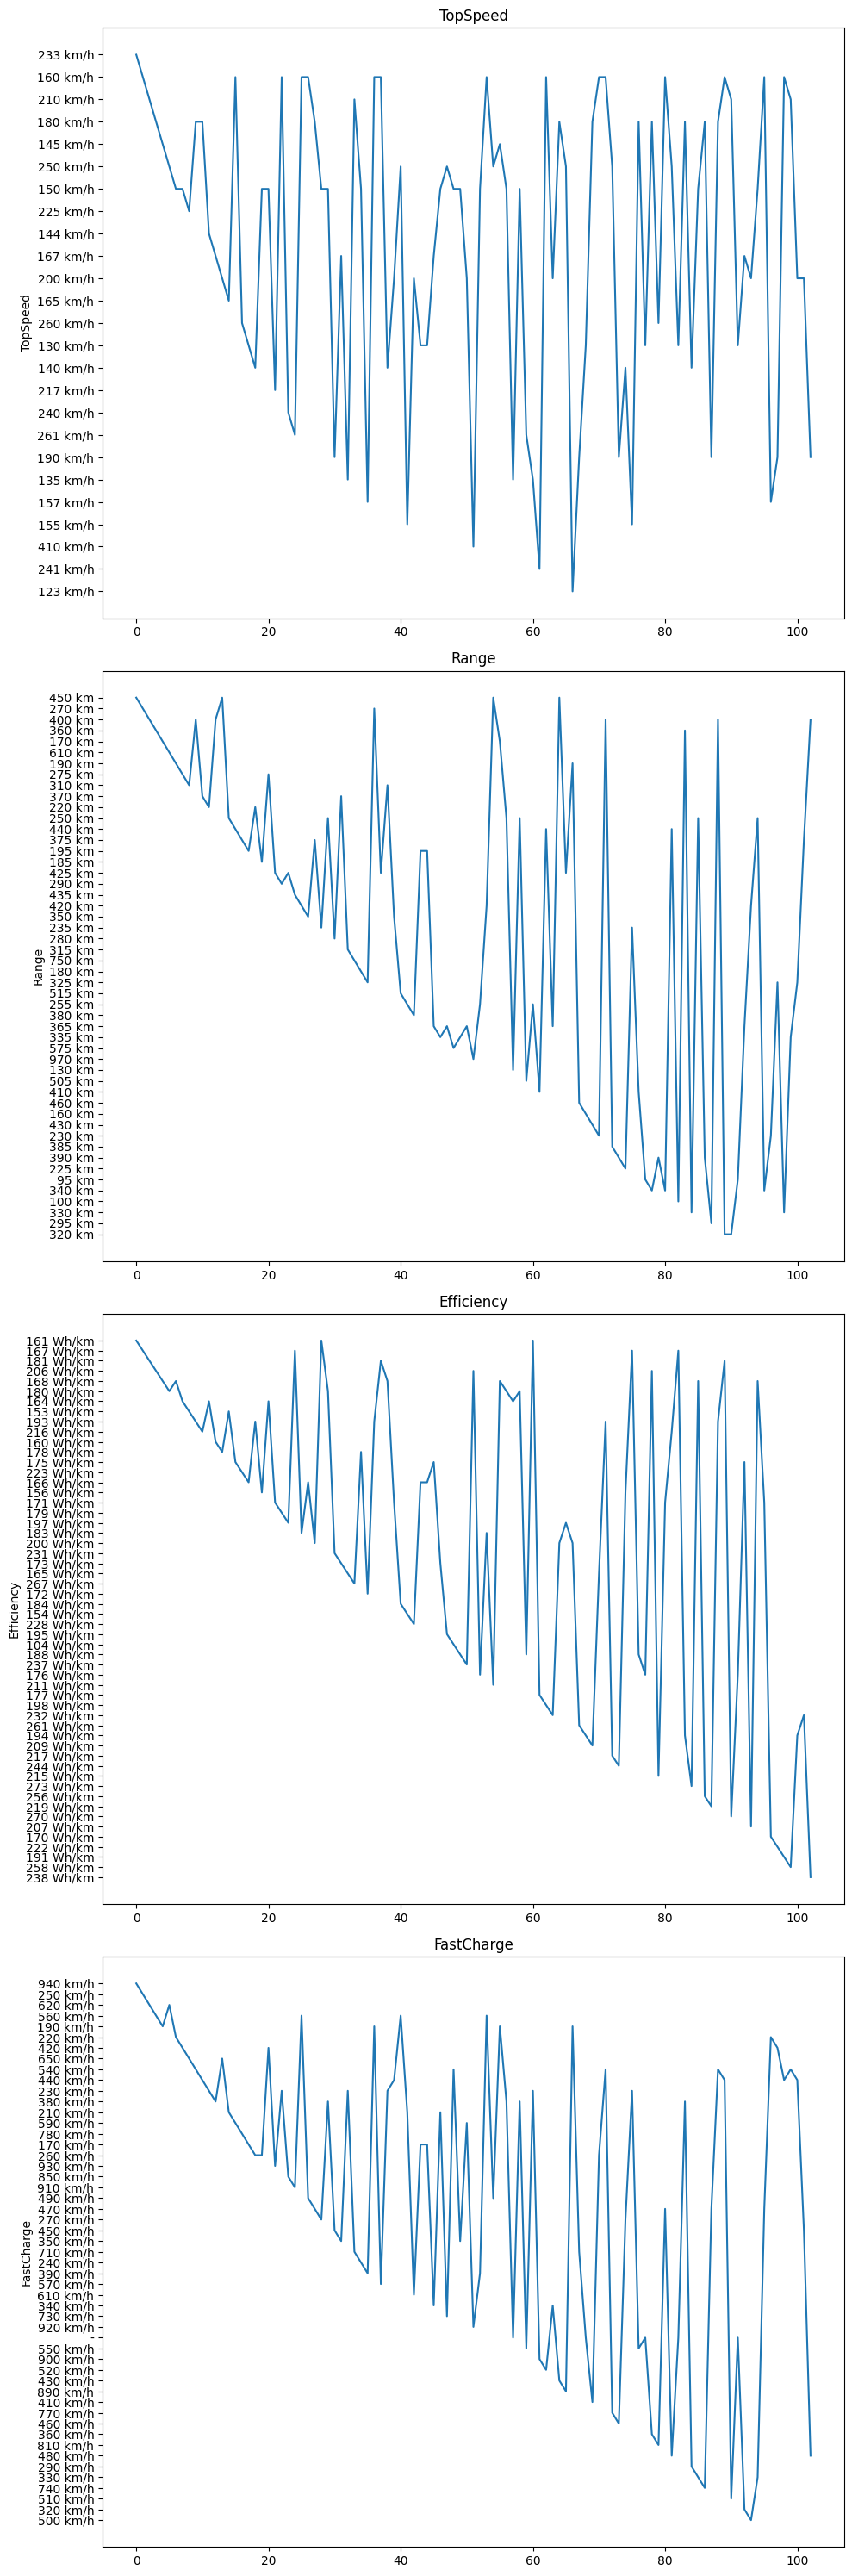

In [ ]:
plt.figure(figsize=(10, 30))  # Adjust the figure size as needed
n = 0

for i, x in enumerate(['TopSpeed', 'Range', 'Efficiency', 'FastCharge'], 1):
    plt.subplot(4, 1, i)
    sns.lineplot(data=df[x])
    plt.title(f'{x}')
    plt.xlabel('')  # Remove x-axis label for better layout
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#DATASET 2

#IMPORT LIBRARIES

In [ ]:
!pip install -q kaleido
import plotly.express as px
import kaleido #Import kaleido after installation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00


#LOAD THE DATASET

In [ ]:
data = pd.read_csv("behavioural_dataset.csv")


In [ ]:
data.describe


<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       2000000  1000000  
2            Yes       1800000  1200000  
3             No       2200000  1200000  
4            Yes       2600000  1600000  
..           ...           ...      ...  
94            No       2400000  1600000  
95            No       5100000  1600000  
96           Yes       2200000  1100000  
97            No       4000000  1500000  
98           Yes       2200000  1100000  

[99 rows x 8 columns]>

In [ ]:
print(pd.isnull(data).sum())


Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Car_Loan            0
Total Salary        0
EV_Price            0
dtype: int64


In [ ]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


#PLOTTING

<ipython-input-30-e2bab3d88a5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Loan', data=data[data['Marrital Status'] == status], palette='Set1')


<Figure size 1000x600 with 0 Axes>

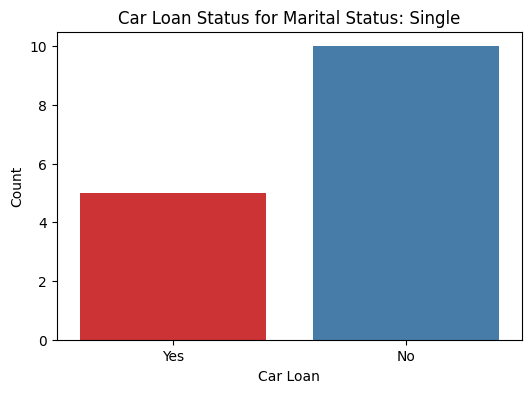

<ipython-input-30-e2bab3d88a5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Loan', data=data[data['Marrital Status'] == status], palette='Set1')


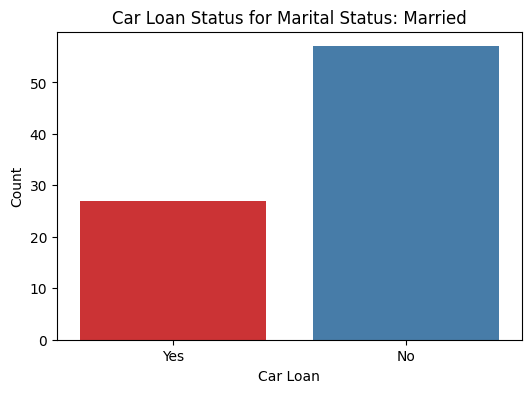

In [ ]:
marital_statuses = data['Marrital Status'].unique()

plt.figure(figsize=(10, 6))
for status in marital_statuses:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Car_Loan', data=data[data['Marrital Status'] == status], palette='Set1')
    plt.title(f'Car Loan Status for Marital Status: {status}')
    plt.xlabel('Car Loan')
    plt.ylabel('Count')
    plt.show()

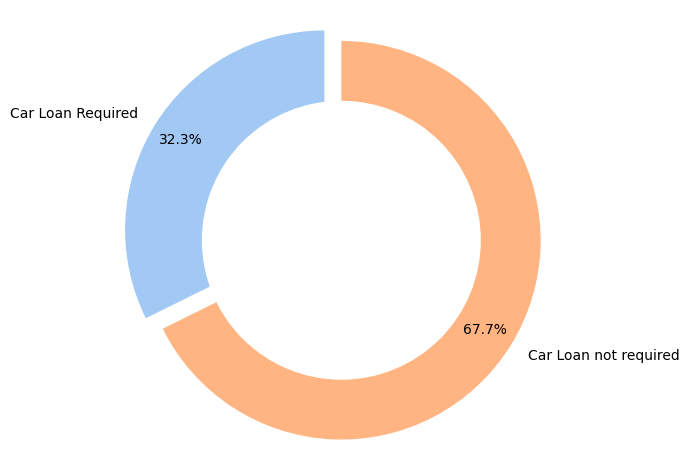

In [ ]:
  labels = ['Car Loan Required', 'Car Loan not required']
  loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(), data.query('Car_Loan == "No"').Car_Loan.count()]

  explode = [0.1, 0]

  palette_color = sns.color_palette('pastel')

  fig, ax = plt.subplots()
  ax.pie(loan_status, labels=labels, colors=palette_color, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

  center_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig.gca().add_artist(center_circle)

  ax.axis('equal')

  plt.tight_layout()
  plt.show()

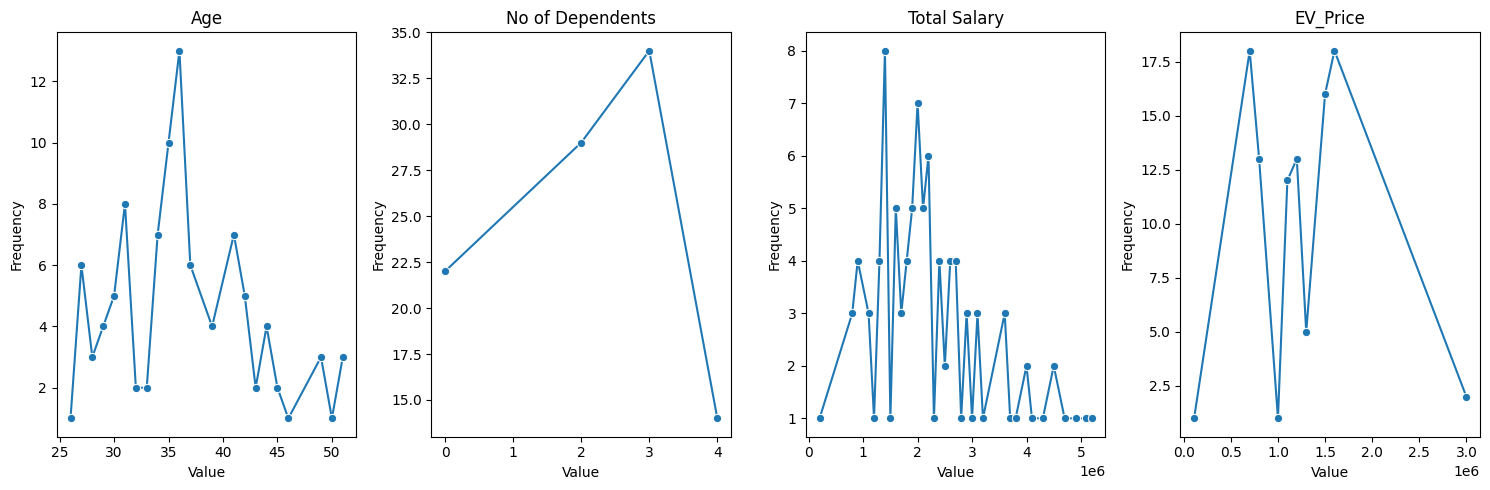

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency of each entry for consumer features with line charts
plt.figure(figsize=(15, 5))

# List of consumer features
consumer_features = ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']

# Iterate through each feature and plot line chart
for i, feature in enumerate(consumer_features, 1):
    plt.subplot(1, 4, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.lineplot(data=data[feature].value_counts().sort_index(), marker='o')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()